- https://github.com/JuliaReach/LazySets.jl/issues/672

In [1]:
using LazySets, Plots

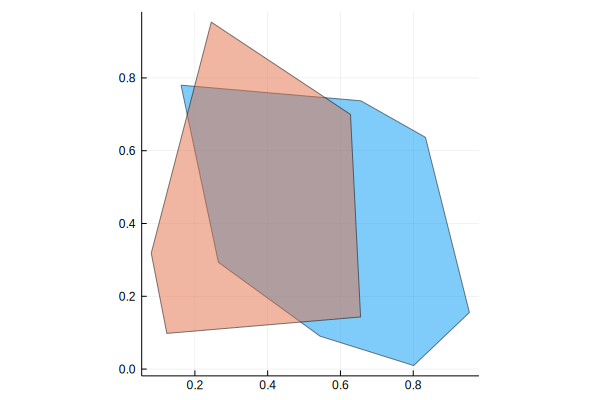

In [14]:
p = VPolygon([[0.161915, 0.780202], 
              [0.264545, 0.293386],  
              [0.54406, 0.0902449],  
              [0.801169, 0.00964868],
              [0.954425, 0.155487],
              [0.8336, 0.636783],
              [0.656131, 0.737161]])

q = VPolygon([[0.0800543, 0.318534],
              [0.122886, 0.0980148],
              [0.655319, 0.143195],
              [0.627578, 0.699661],
              [0.245012, 0.953383]])

plot([p, q])

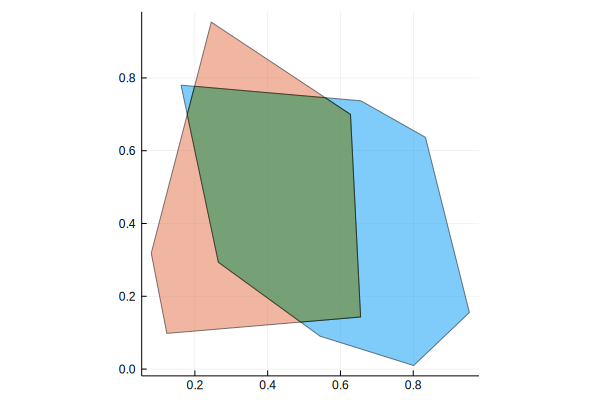

In [9]:
# using the default polyhedra library
using Polyhedra

pv = convert(VPolytope, p)
qv = convert(VPolytope, q)
plot!(intersection(pv, qv))

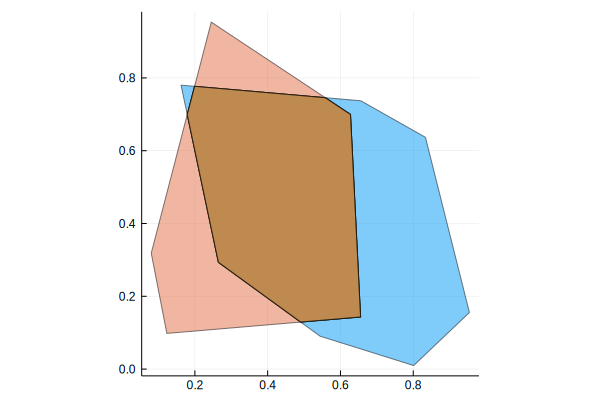

In [6]:
# using CDDLib
using CDDLib

pv = convert(VPolytope, p)
qv = convert(VPolytope, q)
plot!(intersection(pv, qv, backend=CDDLib.Library()))

In [21]:
@btime intersection($pv, $qv, backend=CDDLib.Library())

  645.460 μs (1603 allocations: 77.17 KiB)


VPolytope{Float64}(Array{Float64,1}[[0.558171, 0.745692], [0.19917, 0.776957], [0.17898, 0.699255], [0.264545, 0.293386], [0.490452, 0.129205], [0.655319, 0.143195], [0.627578, 0.699661]])

In [27]:
php = convert(HPolytope, p)
qhp = convert(HPolytope, q)

@btime intersection($php, $qhp)

  435.836 μs (843 allocations: 67.31 KiB)


HPolytope{Float64}(LazySets.HalfSpace{Float64}[HalfSpace{Float64}([0.043041, 0.494216], 0.392557), HalfSpace{Float64}([-0.486816, -0.10263], -0.158895), HalfSpace{Float64}([-0.203141, -0.279515], -0.135746), HalfSpace{Float64}([0.556466, 0.027741], 0.368635), HalfSpace{Float64}([0.253722, 0.382566], 0.426897), HalfSpace{Float64}([-0.634849, 0.164958], 0.00172224), HalfSpace{Float64}([0.0451802, -0.532433], -0.0466343)])

In [28]:
@btime intersection($php, $qhp, backend=CDDLib.Library())

  283.551 μs (593 allocations: 26.70 KiB)


HPolytope{Float64}(LazySets.HalfSpace{Float64}[HalfSpace{Float64}([0.043041, 0.494216], 0.392557), HalfSpace{Float64}([-0.486816, -0.10263], -0.158895), HalfSpace{Float64}([-0.203141, -0.279515], -0.135746), HalfSpace{Float64}([0.556466, 0.027741], 0.368635), HalfSpace{Float64}([0.253722, 0.382566], 0.426897), HalfSpace{Float64}([-0.634849, 0.164958], 0.00172224), HalfSpace{Float64}([0.0451802, -0.532433], -0.0466343)])

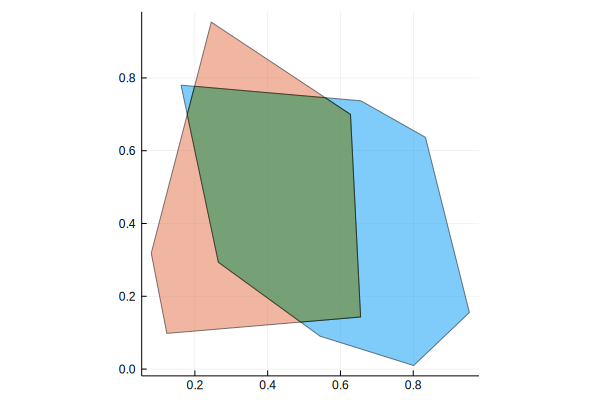

In [15]:
# using HPolygon intersection in LazySets

ph = convert(HPolygon, p)
qh = convert(HPolygon, q)
plot!(intersection(ph, qh))

In [20]:
@btime intersection($ph, $qh)

  141.359 μs (489 allocations: 26.33 KiB)


HPolygon{Float64}(LazySets.HalfSpace{Float64}[HalfSpace{Float64}([0.556466, 0.027741], 0.368635), HalfSpace{Float64}([0.253722, 0.382566], 0.426897), HalfSpace{Float64}([0.043041, 0.494216], 0.392557), HalfSpace{Float64}([-0.634849, 0.164958], 0.00172224), HalfSpace{Float64}([-0.486816, -0.10263], -0.158895), HalfSpace{Float64}([-0.203141, -0.279515], -0.135746), HalfSpace{Float64}([0.0451802, -0.532433], -0.0466343)])

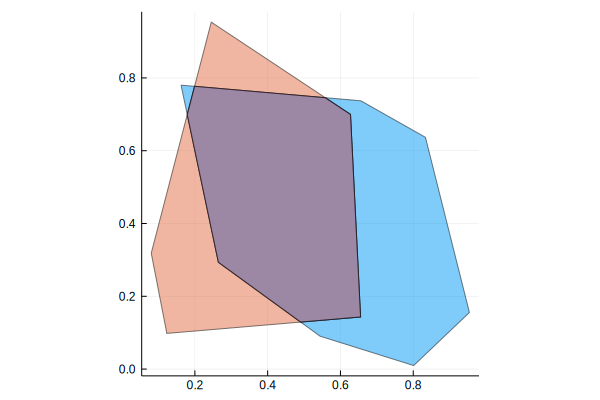

In [17]:
plot!(intersection(p, q))

In [29]:
@btime intersection($p, $q)

  2.594 ms (32355 allocations: 1.84 MiB)


VPolygon{Float64}(Array{Float64,1}[[0.17898, 0.699255], [0.264545, 0.293386], [0.490452, 0.129205], [0.655319, 0.143195], [0.627578, 0.699661], [0.558171, 0.745692], [0.19917, 0.776957]])

In [22]:
2.568e-3 / 141e-6

18.212765957446805

In [23]:
645e-6 / 141e-6

4.574468085106382

In [31]:
@which intersection(p, q)

intersection(P1::Union{VPolygon{N}, VPolytope{N}}, P2::Union{VPolygon{N}, VPolytope{N}}) where N<:Real in LazySets at /Users/forets/.julia/dev/LazySets/src/concrete_intersection.jl:412